In [102]:
"""
COMP9517 Lab 03, Week 4 -- z5075018
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image, ImageOps, ImageEnhance

size = 100, 100

img_names = ["pics/car.png", "pics/shapes.png"]
ext_names = ["pics/aus_coins.png", "pics/kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()


#for img_path in images:
def run_code(img_path, q2_invert=False, q2_brightval=None):
    print('Running for:', img_path)
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]

    #
    # +--------------------+
    # |     Question 1     |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    chan_r = img_mat[:,:,0]  # (done to not interweave rgb channels w. pixels)
    chan_g = img_mat[:,:,1]
    chan_b = img_mat[:,:,2]
    chan_shape = chan_r.shape

    # Step 2 - Combine the three colour channels by flatten each channel 
	# then stacking the flattened channels together.
    # This gives the "colour_samples"
    colour_samples = np.transpose( np.array([chan_r.ravel(), chan_g.ravel(), chan_b.ravel()]) )

    # Step 3 - Perform Meanshift  clustering
    # For larger images, this may take a few minutes to compute.
    #  * Bin seeding reduces #seeds initialised; returns KMeans class
    #  * call .fit_predict() to actually run the MeanShift alg on the img
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    # Step 4 - reshape ms_labels back to the original image shape 
	# for displaying the segmentation output 
    #ms_labels = []
    ms_labels = np.reshape(ms_labels, chan_shape)
    print(" * MeanShift classes:", np.unique(ms_labels))
    
    #%%
    #
    # +--------------------+
    # |     Question 2     |
    # +--------------------+
    #

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_processed = img
        
    if q2_invert:
        img_processed = ImageOps.invert(img)
    
    img_processed = img_processed.convert('L')
    
    if q2_brightval:
        img_processed = ImageEnhance.Brightness(img_processed).enhance(q2_brightval)
    
    img_array = np.array(img_processed)
	
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    # https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html
    distance = ndi.distance_transform_edt(img_array)
	
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    # https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_peak_local_max.html
    local_maxi = peak_local_max(distance, indices=False, labels=img_array)
    markers = ndi.label(local_maxi)[0]
	
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels =  watershed(-distance, markers, mask=img_array)
    print(" * Watershed classes:", np.unique(ws_labels))

    # Display the results
    plot_three_images(img_path, img_processed, "Processed Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    # plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",
    #                   ws_labels, "Watershed Labels")
    return img, img_processed, ms_clf, ms_labels, distance, markers, ws_labels
    
#%%
#
# +-------------------+
# |     Extension     |
# +-------------------+
#
# Loop for the extension component
# for img_path in ext_images:
#     img = Image.open(img_path)
#     img.thumbnail(size)


#     # TODO: perform meanshift on image
#     ms_labels = img  # CHANGE THIS

#     # TODO: perform an optimisation (pre-processing) and then watershed on image
#     ws_labels = img  # CHANGE THIS

#     # Display the results
#     plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
#                       ws_labels, "Watershed Labels")


Running for: pics/car.png
 * MeanShift classes: [0 1 2 3 4 5]
 * Watershed classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]


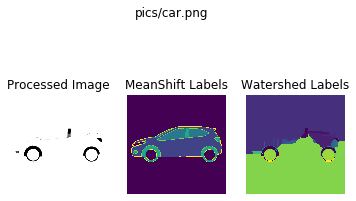

In [111]:
#img, img_processed, ms_clf, ms_labels, distance, markers, ws_labels = run_code(images[0], True, 1)
img, img_processed, ms_clf, ms_labels, distance, markers, ws_labels = run_code(images[0], True, 10)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

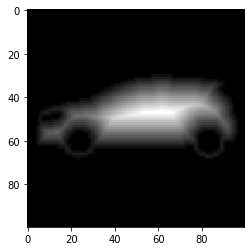

In [109]:
#import cv2
#img = cv2.cvtColor(cv2.imread(images[0]), cv2.COLOR_BGR2GRAY)

# img = Image.open(images[0]).convert("L")
# img.thumbnail(size)
# plt.imshow(img, cmap=plt.get_cmap('gray'))
# plt.axis('off')

plt.imshow(distance, cmap=plt.get_cmap('gray'))
np.unique(markers)

Running for: pics/shapes.png
 * MeanShift classes: [0 1 2 3]
 * Watershed classes: [0 1 2 3 4 5 6 7]


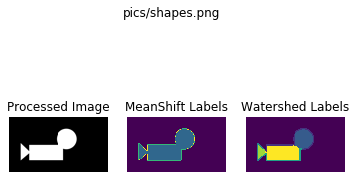

In [84]:
# the successful image
img_shapes, img_processed_shapes, ms_clf_shapes, ms_labels_shapes, distance_shapes, markers_shapes, ws_labels_shapes = run_code(images[1])

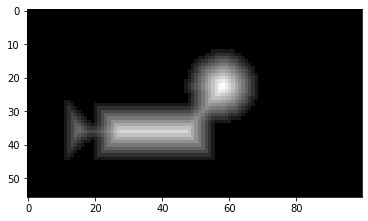

In [85]:
plt.imshow(distance_shapes, cmap=plt.get_cmap('gray'))

In [86]:
np.unique(markers_shapes)

array([0, 1, 2, 3, 4, 5, 6, 7])

Running for: pics/aus_coins.png
 * MeanShift classes: [0 1 2]
 * Watershed classes: [0 1 2 3]


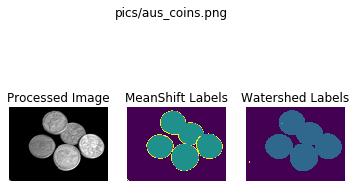

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=100x75 at 0x21B00385348>,
 <PIL.Image.Image image mode=L size=100x75 at 0x21B00299788>,
 MeanShift(bandwidth=None, bin_seeding=True, cluster_all=True, min_bin_freq=1,
           n_jobs=None, seeds=None),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [1, 2, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.41421356, 1.

In [112]:
img_coins, img_processed_coins, ms_clf_coins, ms_labels_coins, distance_coins, markers_coins, ws_labels_coins = run_code(ext_images[0])

Running for: pics/aus_coins.png
 * MeanShift classes: [0 1 2]
 * Watershed classes: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


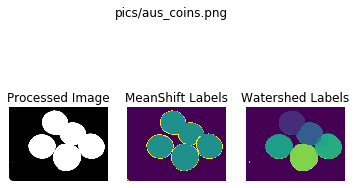

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=100x75 at 0x21B7A05A188>,
 <PIL.Image.Image image mode=L size=100x75 at 0x21B00FA7F08>,
 MeanShift(bandwidth=None, bin_seeding=True, cluster_all=True, min_bin_freq=1,
           n_jobs=None, seeds=None),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [1, 2, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.41421356, 1.

In [113]:
img_coins, img_processed_coins, ms_clf_coins, ms_labels_coins, distance_coins, markers_coins, ws_labels_coins = run_code(ext_images[0], False, 10)

Running for: pics/kiwi.png
 * MeanShift classes: [0 1 2 3 4 5 6]
 * Watershed classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


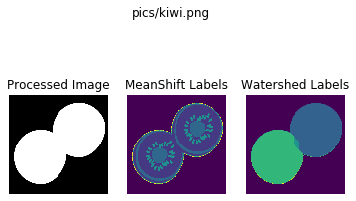

In [115]:
img_kiwi, img_processed_kiwi, ms_clf_kiwi, ms_labels_kiwi, distance_kiwi, markers_kiwi, ws_labels_kiwi = run_code(ext_images[1], False, 10)